# PROJETO DE DISCIPLINA - REDES NEURAIS PROFUNDAS

### Aluno: Gabriel Angelo Bassetti Machado

### 1 - Leia o artigo Review of deep learning: concepts, CNN architectures, challenges, applications, future directions (Alzubaidi, L. 2021). Baseado no artigo, descreva os principais desafios e limitações de DL. Quais alternativas os autores dão aos problemas?

Alguns desafios e limitações comuns associados ao Deep Learning:

- Requerimento de Dados Abundantes e Rotulados: Um dos principais desafios do aprendizado profundo é a necessidade de grandes volumes de dados de treinamento rotulados. Nem sempre é fácil obter conjuntos de dados suficientes e de alta qualidade para treinar modelos de aprendizado profundo, especialmente em domínios específicos.Podemos adotar a métrica de forma empírica de 10x o números de dados referente o número de parâmetros

- Interpretabilidade e Explicabilidade: Modelos de Depp Learning muitas vezes são considerados caixas-pretas devido à complexidade de suas arquiteturas e operações. Isso torna difícil para os usuários entenderem como e por que um modelo tomou uma determinada decisão. No mundo dos negócios é necessário explicar o caminho para conseguir vender o projeto.

- Necessidade de Poder Computacional e Recursos: Treinar modelos de Deep Learning geralmente requer recursos computacionais significativos, como GPUs e CPUs, bem como grandes quantidades de memória e armazenamento. Isso pode ser um obstáculo para pesquisadores e organizações com recursos limitados.

- Transferência de Aprendizado Limitada: Embora a transferência de aprendizado (transfer learning) seja amplamente utilizada para aproveitar modelos pré-treinados em tarefas relacionadas, nem sempre é fácil adaptar esses modelos para novos domínios ou problemas específicos.

- Robustez e Generalização: Modelos de aprendizado profundo podem ser sensíveis a perturbações nos dados de entrada e podem ter dificuldades em generalizar para exemplos que estão fora da distribuição dos dados de treinamento. Isso pode levar a problemas de robustez e desempenho insatisfatório em condições do mundo real.

Como alternativas para lidar com esses desafios:

- Augmentação de dados para lidar com a escassez de dados rotulados.
- Técnicas de interpretabilidade de modelos para tornar os modelos mais transparentes e explicáveis.
- Otimização de arquiteturas de rede e algoritmos para reduzir a carga computacional.
- Uso de técnicas de regularização para melhorar a generalização dos modelos.
- Exploração de métodos de transferência de aprendizado mais avançados e adaptação de modelos pré-treinados para domínios específicos.

### 2 - Cite 3 aplicações de algoritmos de Deep Learning. Uma delas tem que usar uma solução com CNN e uma delas tem que usar uma solução de RNNs. Explique a aplicação e os resultados obtidos. Não deixe de citar a fonte utilizada, sendo preferencialmente artigos.

Reconhecimento de Imagens Médicas usando CNNs: Um exemplo de aplicação é a detecção de câncer de pele por meio da análise de imagens dermatoscópicas. Pesquisadores utilizaram redes neurais convolucionais (CNNs) para classificar lesões de pele como benignas ou malignas. Por exemplo, um estudo publicado no periódico "Nature" em 2017 (https://www.nature.com/articles/nature21056) demonstrou que uma CNN treinada com uma grande base de dados de imagens dermatoscópicas superou dermatologistas em termos de precisão na classificação de lesões de pele.

Tradução Automática usando RNNs: As Redes Neurais Recorrentes (RNNs) são frequentemente utilizadas em tarefas de sequência, como tradução automática. Um exemplo é o sistema de tradução automática do Google, que utiliza uma arquitetura de RNN chamada "Google Neural Machine Translation" (GNMT). Este sistema traduz de e para várias línguas e alcançou resultados significativos em termos de qualidade de tradução. Um estudo detalhado sobre o GNMT foi publicado pela equipe do Google em 2016 (https://arxiv.org/abs/1609.08144).

Reconhecimento de Fala usando RNNs: As RNNs também são amplamente empregadas em reconhecimento de fala. Um exemplo notável é o sistema de reconhecimento de fala da empresa Baidu, chamado Deep Speech. Este sistema utiliza uma arquitetura de RNN chamada "Connectionist Temporal Classification" (CTC) para transcrever automaticamente fala em texto. Em um estudo publicado pela equipe da Baidu em 2014 (https://arxiv.org/abs/1412.5567), demonstrou-se que o Deep Speech alcançou resultados competitivos em termos de precisão de transcrição em comparação com sistemas de reconhecimento de fala tradicionais.

### 3 - Vamos fazer uma análise:

- Utilize a base Animals-10- originalmente do Kaggle (5000 imagens de 10 animais diferentes), mas disponibilizada em uma versão menor aqui;
- Utilizando um modelo pré-treinado ResNet-50 (presente no Tensorflow/Keras), e realize as extrações de características, fazendo a projeção das imagens no espaço característico (penúltima camada da ResNet-50);
- Realize a clusterização dos vetores obtidos usando o algoritmo K-médias (K=10);
- Mostre exemplos de imagens dos 10 clusters obtidos;
- Os resultados foram satisfatórios? Justifique utilizando seus conhecimentos sobre avaliação de clusters;
- Disponibilize os códigos, bem como o relatório final no Github;
- O projeto deve estar na organização proposta pela TDSP (Microsoft).


#### 3.1 - Importando bibliotecas

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import tensorflow as tf
import tensorflow.keras as K

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


#### 3.2 - Importando imagens e verificando

In [2]:
# Função para carregar imagens e pré-processá-las
def load_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        images.append(img)
    return np.vstack(images)

In [3]:
# Diretório contendo as imagens
base_dir = r'C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\10 - Deeplearning\PD\imagens'

# Lista todas as pastas dentro do diretório
pastas = [nome for nome in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, nome))]

# Imprime o nome de todas as pastas
for pasta in pastas:
    print(pasta)

butterfly
cat
chicken
cow
dogs
elephant
horse
sheep
spider
squirrel


In [4]:
image_files = os.listdir(base_dir)

In [5]:
paths = []

for img in image_files:
    path2 = os.path.join(base_dir, img)
    for img2 in os.listdir(path2):
        path3 = (os.path.join(path2, img2))
        paths.append(path3)

In [6]:
images = load_images(paths)

In [7]:
images.shape

(5000, 224, 224, 3)

In [8]:
# Carregar as imagens e obter as features da penúltima camada da ResNet50
model = ResNet50( include_top=False)

In [9]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [10]:
features = model.predict(images)
features_flatten = features.reshape(features.shape[0], -1)

157/157 [==============================] - 203s 1s/step


In [11]:
7 * 7 * 2048

100352

In [12]:
features.shape

(5000, 7, 7, 2048)

In [13]:
features_flatten[0]

array([0.        , 0.        , 0.        , ..., 0.06594431, 0.        ,
       0.        ], dtype=float32)

In [14]:
features_flatten.shape

(5000, 100352)

In [15]:
# Clusterização usando K-means
kmeans = KMeans(n_clusters=10)
kmeans.fit(features_flatten)
cluster_labels = kmeans.labels_

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


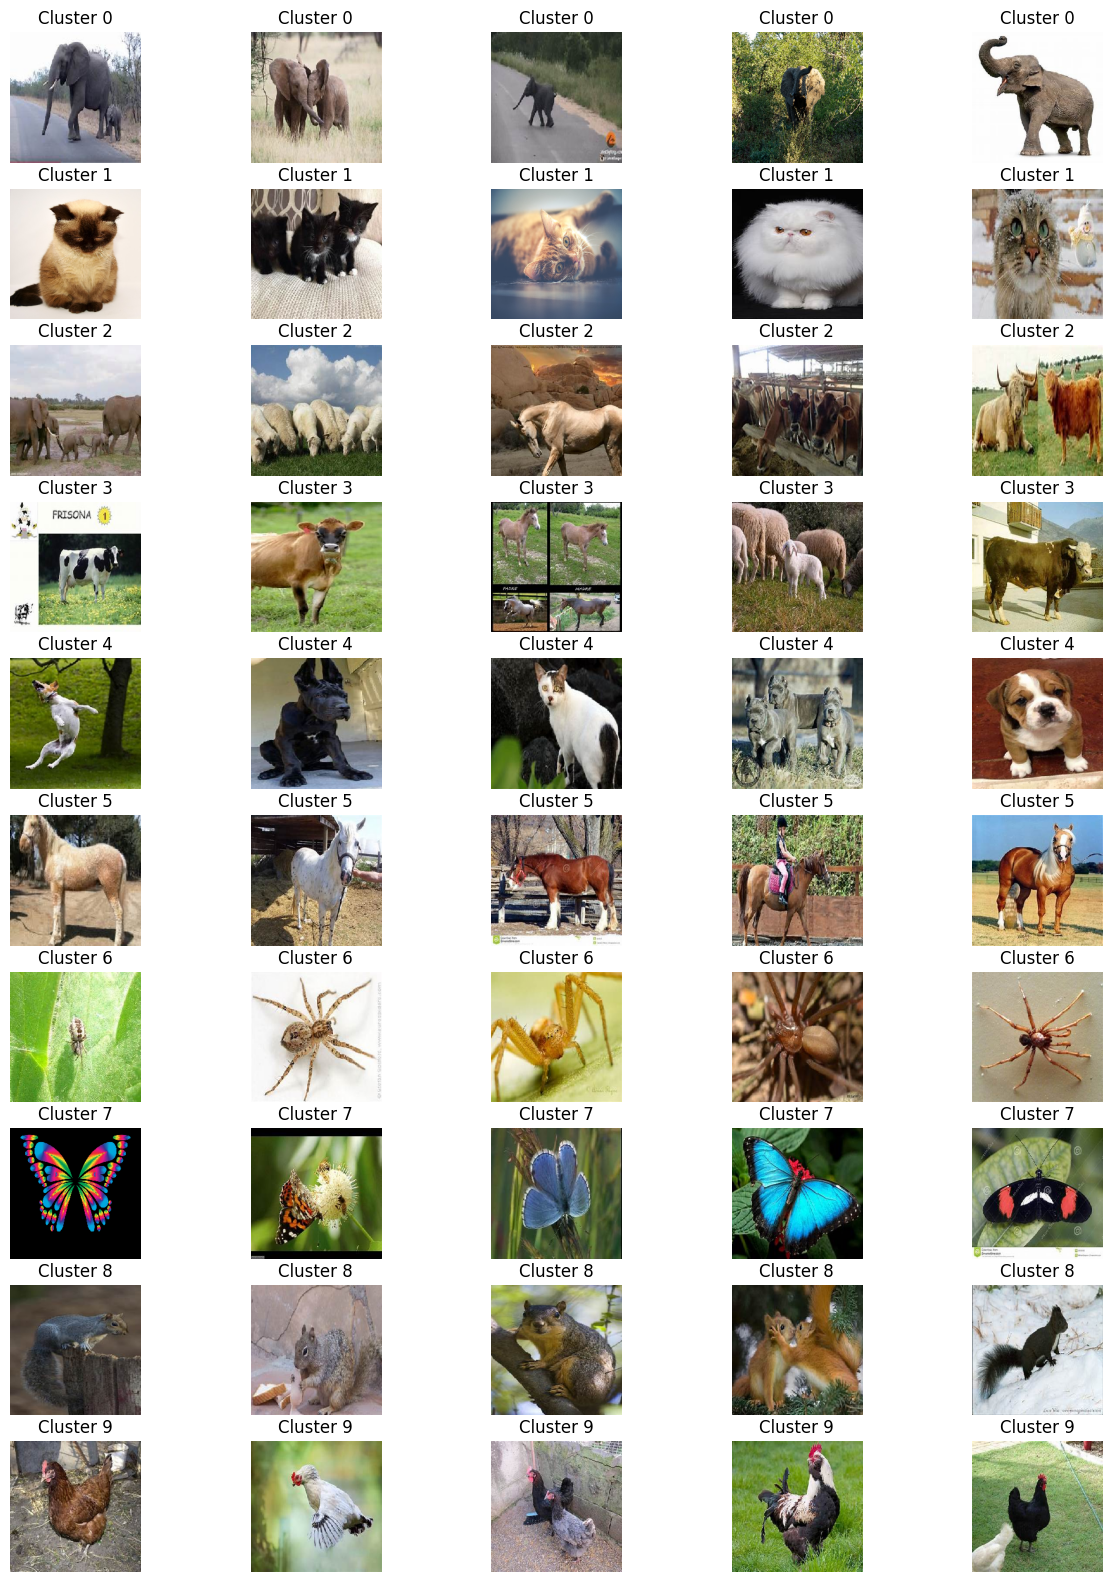

In [16]:
# Exibir exemplos de imagens para cada cluster
num_examples = 5
fig, axs = plt.subplots(10, num_examples, figsize=(15, 20))

for cluster_id in range(10):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = np.random.choice(cluster_indices, num_examples, replace=False)
    for i, sample_idx in enumerate(cluster_samples):
        img = image.load_img(paths[sample_idx], target_size=(224, 224))
        axs[cluster_id, i].imshow(img)
        axs[cluster_id, i].axis('off')
        axs[cluster_id, i].set_title(f'Cluster {cluster_id}')

plt.show()

#### 3.3 - Avaliação do modelo

Avaliando o modelo, vemos que em alguns clusters ele apresenta problema, e adotando um parâmetro de 95% de acerto, considerando nossa amostragem, nosso resultado não é satisfatório.

### 4 - Utilizando a biblioteca sklearn-llm (você necessitará de uma chave de acesso da openai), crie um classificador de sentimentos usando a classe ZeroShotGPTClassifier com o modelo gpt-3.5-turbo. (use o dataset get_classification_dataset, com os labels ["positive', "negative", "neutral"]). Apresente o código realizado.

In [72]:
# from skllm.config import SKLLMConfig
# SKLLMConfig.set_openai_key("chave")
# SKLLMConfig.set_openai_org("Personal")

In [73]:
from skllm import ZeroShotGPTClassifier
from skllm.datasets import get_classification_dataset

In [74]:
# demo sentiment analysis dataset
# labels: positive, negative, neutral
X, y = get_classification_dataset()

clf = ZeroShotGPTClassifier(openai_model = "gpt-3.5-turbo")
clf.fit(X, y)
labels = clf.predict(X)

  3%|▎         | 1/30 [00:09<04:21,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


  7%|▋         | 2/30 [00:18<04:12,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 10%|█         | 3/30 [00:27<04:03,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 13%|█▎        | 4/30 [00:36<03:54,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 17%|█▋        | 5/30 [00:45<03:45,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 20%|██        | 6/30 [00:54<03:36,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 23%|██▎       | 7/30 [01:03<03:27,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 27%|██▋       | 8/30 [01:12<03:18,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 30%|███       | 9/30 [01:21<03:09,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 33%|███▎      | 10/30 [01:30<03:00,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 37%|███▋      | 11/30 [01:39<02:51,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 40%|████      | 12/30 [01:48<02:42,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 43%|████▎     | 13/30 [01:57<02:33,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 47%|████▋     | 14/30 [02:06<02:24,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 50%|█████     | 15/30 [02:15<02:15,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 53%|█████▎    | 16/30 [02:24<02:06,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 57%|█████▋    | 17/30 [02:33<01:57,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 60%|██████    | 18/30 [02:42<01:48,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 63%|██████▎   | 19/30 [02:51<01:39,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 67%|██████▋   | 20/30 [03:00<01:30,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 70%|███████   | 21/30 [03:09<01:21,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 73%|███████▎  | 22/30 [03:18<01:12,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 77%|███████▋  | 23/30 [03:27<01:03,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 80%|████████  | 24/30 [03:36<00:54,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 83%|████████▎ | 25/30 [03:45<00:45,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 87%|████████▋ | 26/30 [03:54<00:36,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 90%|█████████ | 27/30 [04:03<00:27,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 93%|█████████▎| 28/30 [04:12<00:18,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


 97%|█████████▋| 29/30 [04:21<00:09,  9.03s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


100%|██████████| 30/30 [04:30<00:00,  9.02s/it]

Could not obtain the completion after 3 retries: `APIRemovedInV1 :: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742
`


In [75]:
labels

['negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative']